In [2]:
%matplotlib notebook
# %matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import time, os, io, clipboard
from PIL import ImageGrab
from IPython.display import Image, display
from scipy import stats
import scipy.constants as const
from si_prefix import si_format
from tqdm import tqdm, tqdm_notebook

import pandas as pd
import numpy as np
from io import StringIO 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

pd.set_option("display.precision", 3)
plt.close('all')

import sys 
sys.path.append('..')
# from meas_util import *

import qcodes as qc
from qcodes import Station, load_by_run_spec, load_by_guid
from qcodes.instrument.base import Instrument
from qcodes.dataset.experiment_container import (Experiment,
                                                 load_last_experiment,
                                                 new_experiment)
from qcodes.dataset.database import initialise_database
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
from qcodes.dataset.data_set import load_by_id
# from qcodes.dataset.data_export import get_shaped_data_by_runidb

C:\ProgramData\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'


In [4]:
import sys 
sys.path.append('..')
from JJcalc import *

<IPython.core.display.Javascript object>


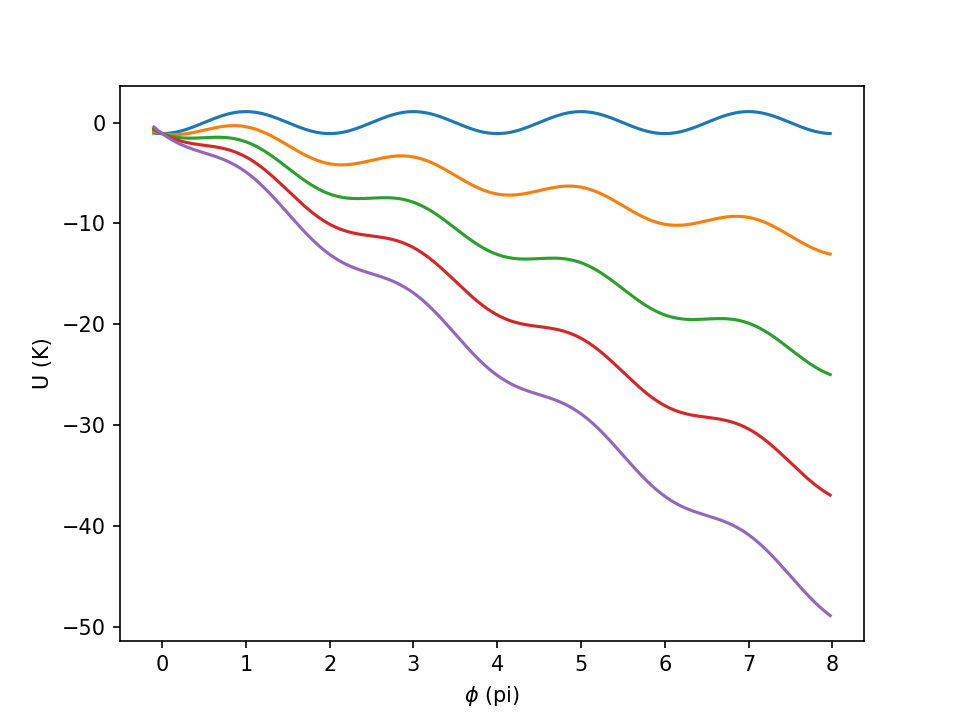

In [5]:
plt.close('all')
f,ax=plt.subplots()
tiltedWashboardU(1089.5586E-3, np.arange(0E-9, 100E-9, 20E-9), ax)
plt.show()

In [6]:
key =    [ 'Device' ,  'Vo/al', 'RN/al',   'ISW' , 'R0ZF' , 'R0FF' , '#ser', '#par', 'Mat.',  'BT' , 'dsgn', 'J size']
unit=    ['       ' ,      'V',   'ohm',     'A' ,  'ohm' ,  'ohm' ,   'ea',   'ea',     '',   'K' ,     '',    'm^2']
lst =   [['53N2'    , 1.610e-3, 9.376e3,    9e-8 ,  np.nan,  np.nan,    20 ,      2,   'Al', 0.030 ,  'Fin', 0.04e-12],
         ['55B1N9'  , 1.675e-3, 1.152e5, 1.53e-10, 1.006e6, 6.668e8,    20 ,      2,   'Al', 0.027 ,  'Fin', 0.04e-12],
         ['59B6N3'  , 1.875e-3, 8.438e4, 1.98e-9 , 7.883e4, 2.591e7,    20 ,      2,   'Al', 0.030 ,  'Fin', 0.04e-12],
         ['59B0N1'  , 2.178e-4, 8.756e3,  3.9e-9 , 1.314e3, 1.650e9,     2 ,      2,   'Al', 0.030 ,  'Fin', 0.04e-12],
         ['59BBN2'  , 1.385e-3, 1.754e6,  3.2e-13, 2.367e8, 9.032e8,    20 ,      2,   'Al', 0.030 ,  'Fin', 0.04e-12],
         ['62B3N2'  , 2.495e-3, 9.935e5,  2.1e-11, 4.319e6, 8.931e8,    20 ,      2,   'Al', 0.045 ,  'Fin', 0.04e-12],
         ['60B2N6'  , 3.345e-3, 6.647e5,  1.2e-12, 2.292e7, 9.587e8,    20 ,      2,   'Al', 0.030 ,  'Fin', 0.04e-12],
         ['60B2N2'  , 3.186e-4, 1.199e5, 2.68e-12, 2.909e7, 9.209e8,     4 ,      2,   'Al', 0.030 ,  'Fin', 0.04e-12],
         ['63BAN6_b', 5.010e-3, 5.942e5,  2.0e-11, 7.715e6, 9.350e8,    30 ,      2,   'Al', 0.030 ,  'x_s', 0.04e-12],
         ['63BAN6_a', 3.070e-3, 5.859e5,  2.2e-11, 2.650e5, 1.380e7,    30 ,      2,   'Al', 0.030 ,  'x_s',    4e-12],
         ['66B8N5_b', 1.720e-3, 6.613e4,  5.4e-9 , 8.510e2, 1.463e8,    30 ,      2,   'Al', 0.030 ,  'x_s', 0.04e-12],
         ['70B1N0'  ,   np.nan, 1.682e5,  1.6e-10, 2.373e4,  np.nan,    15 ,      2,   'Al', 0.030 ,  'x_L',    4e-12],
         ['79N6'    , 1.645e-4, 1.458e3, 1.37e-7 ,  2.20e0,  np.nan,     1 ,      2,   'Al', 0.030 ,  'x_L', 3.74e-12],
         ['79N5'    , 2.021e-3, 2.335e4,  5.6e-9 , -3.07e2,  np.nan,    15 ,      2,   'Al', 0.030 ,  'x_L', 3.74e-12],
#          ['74N4'    , 1.972e-3, 1.350e4,  9.0e-8 ,  1.00e0,  np.nan,     9 ,      2,   'Al', 0.030 ,  'x_L', 2.25e-12],
         ['74N4'    , 1.972e-3, 1.350e4,  9.0e-9 ,  1.00e0,  np.nan,     9 ,      2,   'Al', 0.030 ,  'x_L', 2.25e-12],
         ['78N0'    , 1.931e-3, 2.542e5, 3.71e-11,  1.00e4,  np.nan,    15 ,      2,   'Al', 0.030 ,  'x_L',    4e-12],
         ['78N5'    , 9.685e-5, 1.670e4,  8.0e-10,  1.00e5,  np.nan,     1 ,      2,   'Al', 0.030 ,  'x_L',    4e-12],
         ['59BBN1'  ,    1e-99,   745e3,  0.6e-12,   240e6,  np.nan,    30 ,      2,   'Al', 0.030 ,  'x_L',  2.00 * 2.00e-12],
         ['59BBN2_n',    1e-99,  1950e3,   np.nan,  np.nan,  np.nan,    30 ,      2,   'Al', 0.030 ,  'x_L',  .150 * .150e-12],
         ['59BBN8'  ,    1e-99,  1780e3, 0.75e-12,    50e6,  np.nan,    30 ,      2,   'Al', 0.030 ,  'x_L',  2.00 * 2.00e-12]]


Q1Dlst =   pd.DataFrame(  data  = list(zip(*lst)), 
                        columns = [[dev[i] for dev in lst] for i in range(len(lst[0]))][0],
                          index = key ).transpose()
Q1Duni =   dict(zip(key, unit))

Q1Dlst = Q1Dlst.replace(to_replace = Q1Dlst[Q1Dlst['Device']=='55B1N9']['R0ZF'][0], value=260367)
Q1Dlst = Q1Dlst.replace(to_replace = Q1Dlst[Q1Dlst['Device']=='55B1N9']['BT'][0], value=0.040)

JJplst = toJJplst(srclst = Q1Dlst)[0]

Q1D = Q1Dlst.transpose().drop('Device').drop('Mat.').drop('dsgn').transpose().astype(float)
JJp = toJJplst(Q1Dlst)[0].transpose().drop('Device').transpose().astype(float)

<IPython.core.display.Javascript object>


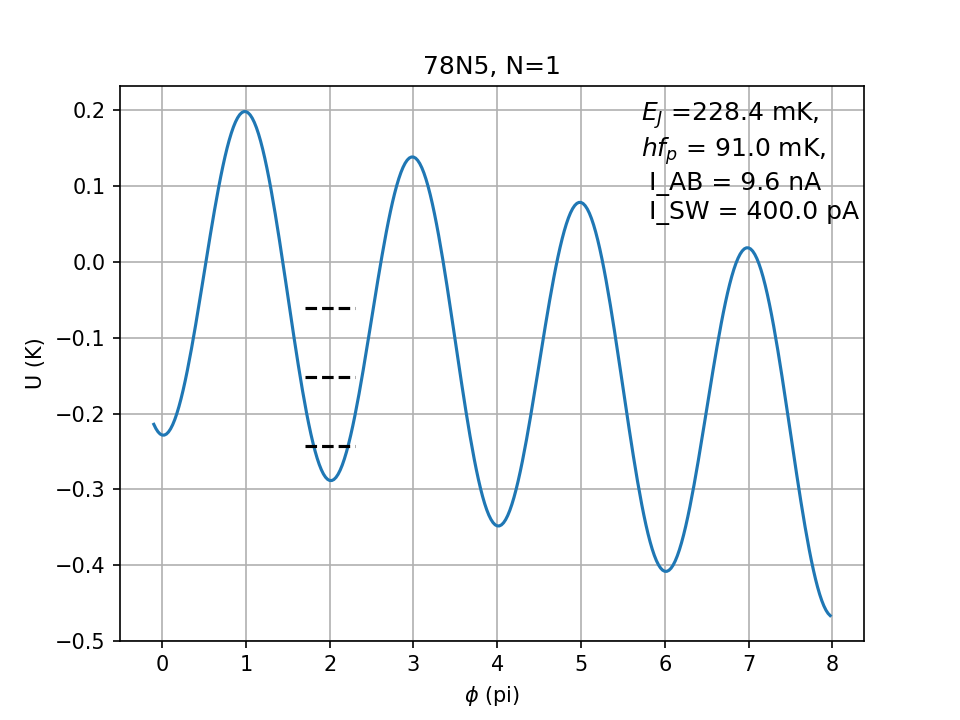

RN_JJ            33.400
Rs/JJ           136.940
I_AB              9.580
EJ                0.228
C_JJQP          205.000
EC                0.005
$\omega_p$       11.916
Q               256.319
beta          65699.234
EJ/EC            50.356
Name: 78N5, dtype: float64
{'Device': '       ', 'RN_JJ': 'kohm', 'Rs/JJ': 'kohm', 'I_AB': 'nA', 'EJ': 'K', 'C_JJQP': 'fF', 'EC': 'K', '$\\omega_p$': 'GHz*2pi', 'Q': '', 'beta': '', 'EJ/EC': ''}


In [7]:
f,ax = plt.subplots()

device = ['78N5']#, '78N5']
for i in device:
    JJplst = toJJplst(Q1Dlst)[0]
    ISW = Q1Dlst[Q1Dlst['Device']==i]['ISW'].astype(float)[0]/2
    EJ = JJplst[JJplst['Device']==i]['EJ'].astype(float)[0]
    tiltedWashboardU(EJ,[ISW],ax)

    freqPlasma = JJplst[JJplst['Device']==i]['$\omega_p$'].astype(float)/2/np.pi*1e9*const.h/const.k
    U = lambda phi : -EJ*const.k*np.cos(phi) - const.h /2/np.pi /2/const.e *ISW *phi
    
    GSE = U(2*np.pi)/const.k
    ZPE = freqPlasma *0.5
    fx = np.asarray([1.7, 2.3])*np.pi
    ax.plot(fx/np.pi, [ GSE+ZPE*1, GSE+ZPE*1 ] ,ls = '--', color = 'black')
    ax.plot(fx/np.pi, [ GSE+ZPE*3, GSE+ZPE*3 ] ,ls = '--', color = 'black')
    ax.plot(fx/np.pi, [ GSE+ZPE*5, GSE+ZPE*5 ] ,ls = '--', color = 'black')

IAB = JJplst[JJplst['Device']==i]['I_AB'].astype(float)[0]*1e-9
ax.text(0.70, 0.75, 
        '$E_J$ ={}K,\n$\it hf_p$ = {}K,\n I_AB = {}A\n I_SW = {}A'.format(si_format(EJ), si_format(freqPlasma[0]), si_format(IAB), si_format(ISW)), 
        verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes,color='black', fontsize=12)

ax.grid()
ax.set_title(device[0]+', N={}'.format(int(Q1Dlst[Q1Dlst['Device']==device[0]]['#ser'])))

print(JJp.transpose()[device[0]])
print(toJJplst(srclst = Q1Dlst)[1])